In [135]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [136]:
data = pd.read_csv(r"C:\\Users\\ASUS\\Desktop\\ML1 project\\household_power_consumption.csv",nrows=5000)
data.shape

(5000, 9)

In [137]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17


In [138]:
data.tail(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4995,20/12/2006,4:39:00,0.414,0.258,246.66,2.0,0,0,0
4996,20/12/2006,4:40:00,0.392,0.250,246.06,1.8,0,0,0
4997,20/12/2006,4:41:00,0.388,0.248,246.52,1.8,0,1,0
4998,20/12/2006,4:42:00,0.310,0.144,247.00,1.4,0,0,0
4999,20/12/2006,4:43:00,0.308,0.144,247.21,1.4,0,0,0


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5000 non-null   object 
 1   Time                   5000 non-null   object 
 2   Global_active_power    5000 non-null   float64
 3   Global_reactive_power  5000 non-null   float64
 4   Voltage                5000 non-null   float64
 5   Global_intensity       5000 non-null   float64
 6   Sub_metering_1         5000 non-null   int64  
 7   Sub_metering_2         5000 non-null   int64  
 8   Sub_metering_3         5000 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 351.7+ KB


In [140]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1             int64
Sub_metering_2             int64
Sub_metering_3             int64
dtype: object

In [141]:
data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data.drop(columns=['Date', 'Time'], inplace=True)
data.set_index('date_time', inplace=True)
data.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0,1,16
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0,2,17
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0,1,17
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0,2,17
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0,1,17
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0,1,17
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0,1,17


In [142]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1             int64
Sub_metering_2             int64
Sub_metering_3             int64
dtype: object

In [143]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.718148,0.120149,240.972194,7.287000,0.787000,3.013600,7.800000
std,1.301801,0.109505,3.961620,5.500968,5.147012,9.325557,8.659734
min,0.194000,0.000000,229.080000,0.800000,0.000000,0.000000,0.000000
25%,0.380000,0.000000,238.157500,1.800000,0.000000,0.000000,0.000000
50%,1.626000,0.104000,241.410000,6.800000,0.000000,0.000000,0.000000
75%,2.502000,0.176000,244.050000,10.400000,0.000000,1.000000,17.000000
max,7.840000,0.646000,249.370000,33.600000,38.000000,73.000000,20.000000


In [144]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

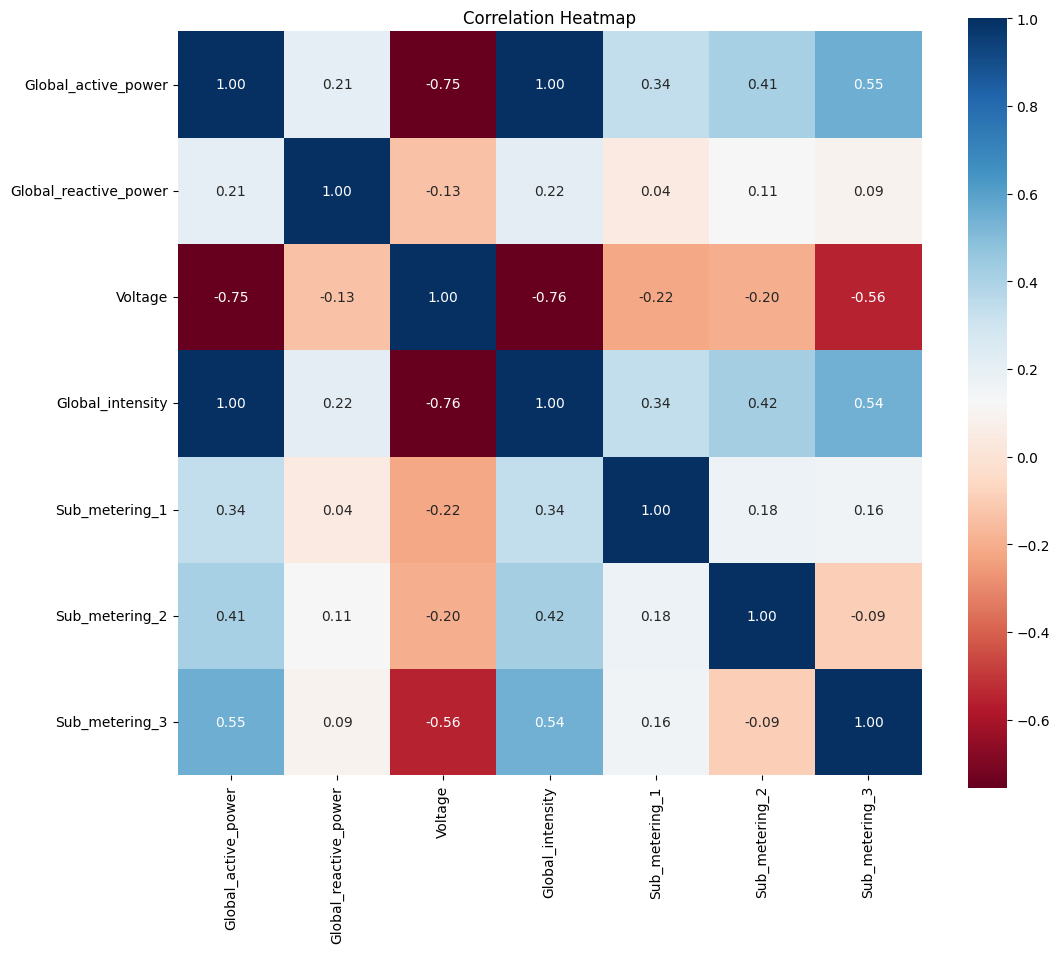

In [145]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='RdBu',square=True)
plt.title("Correlation Heatmap")
plt.show()

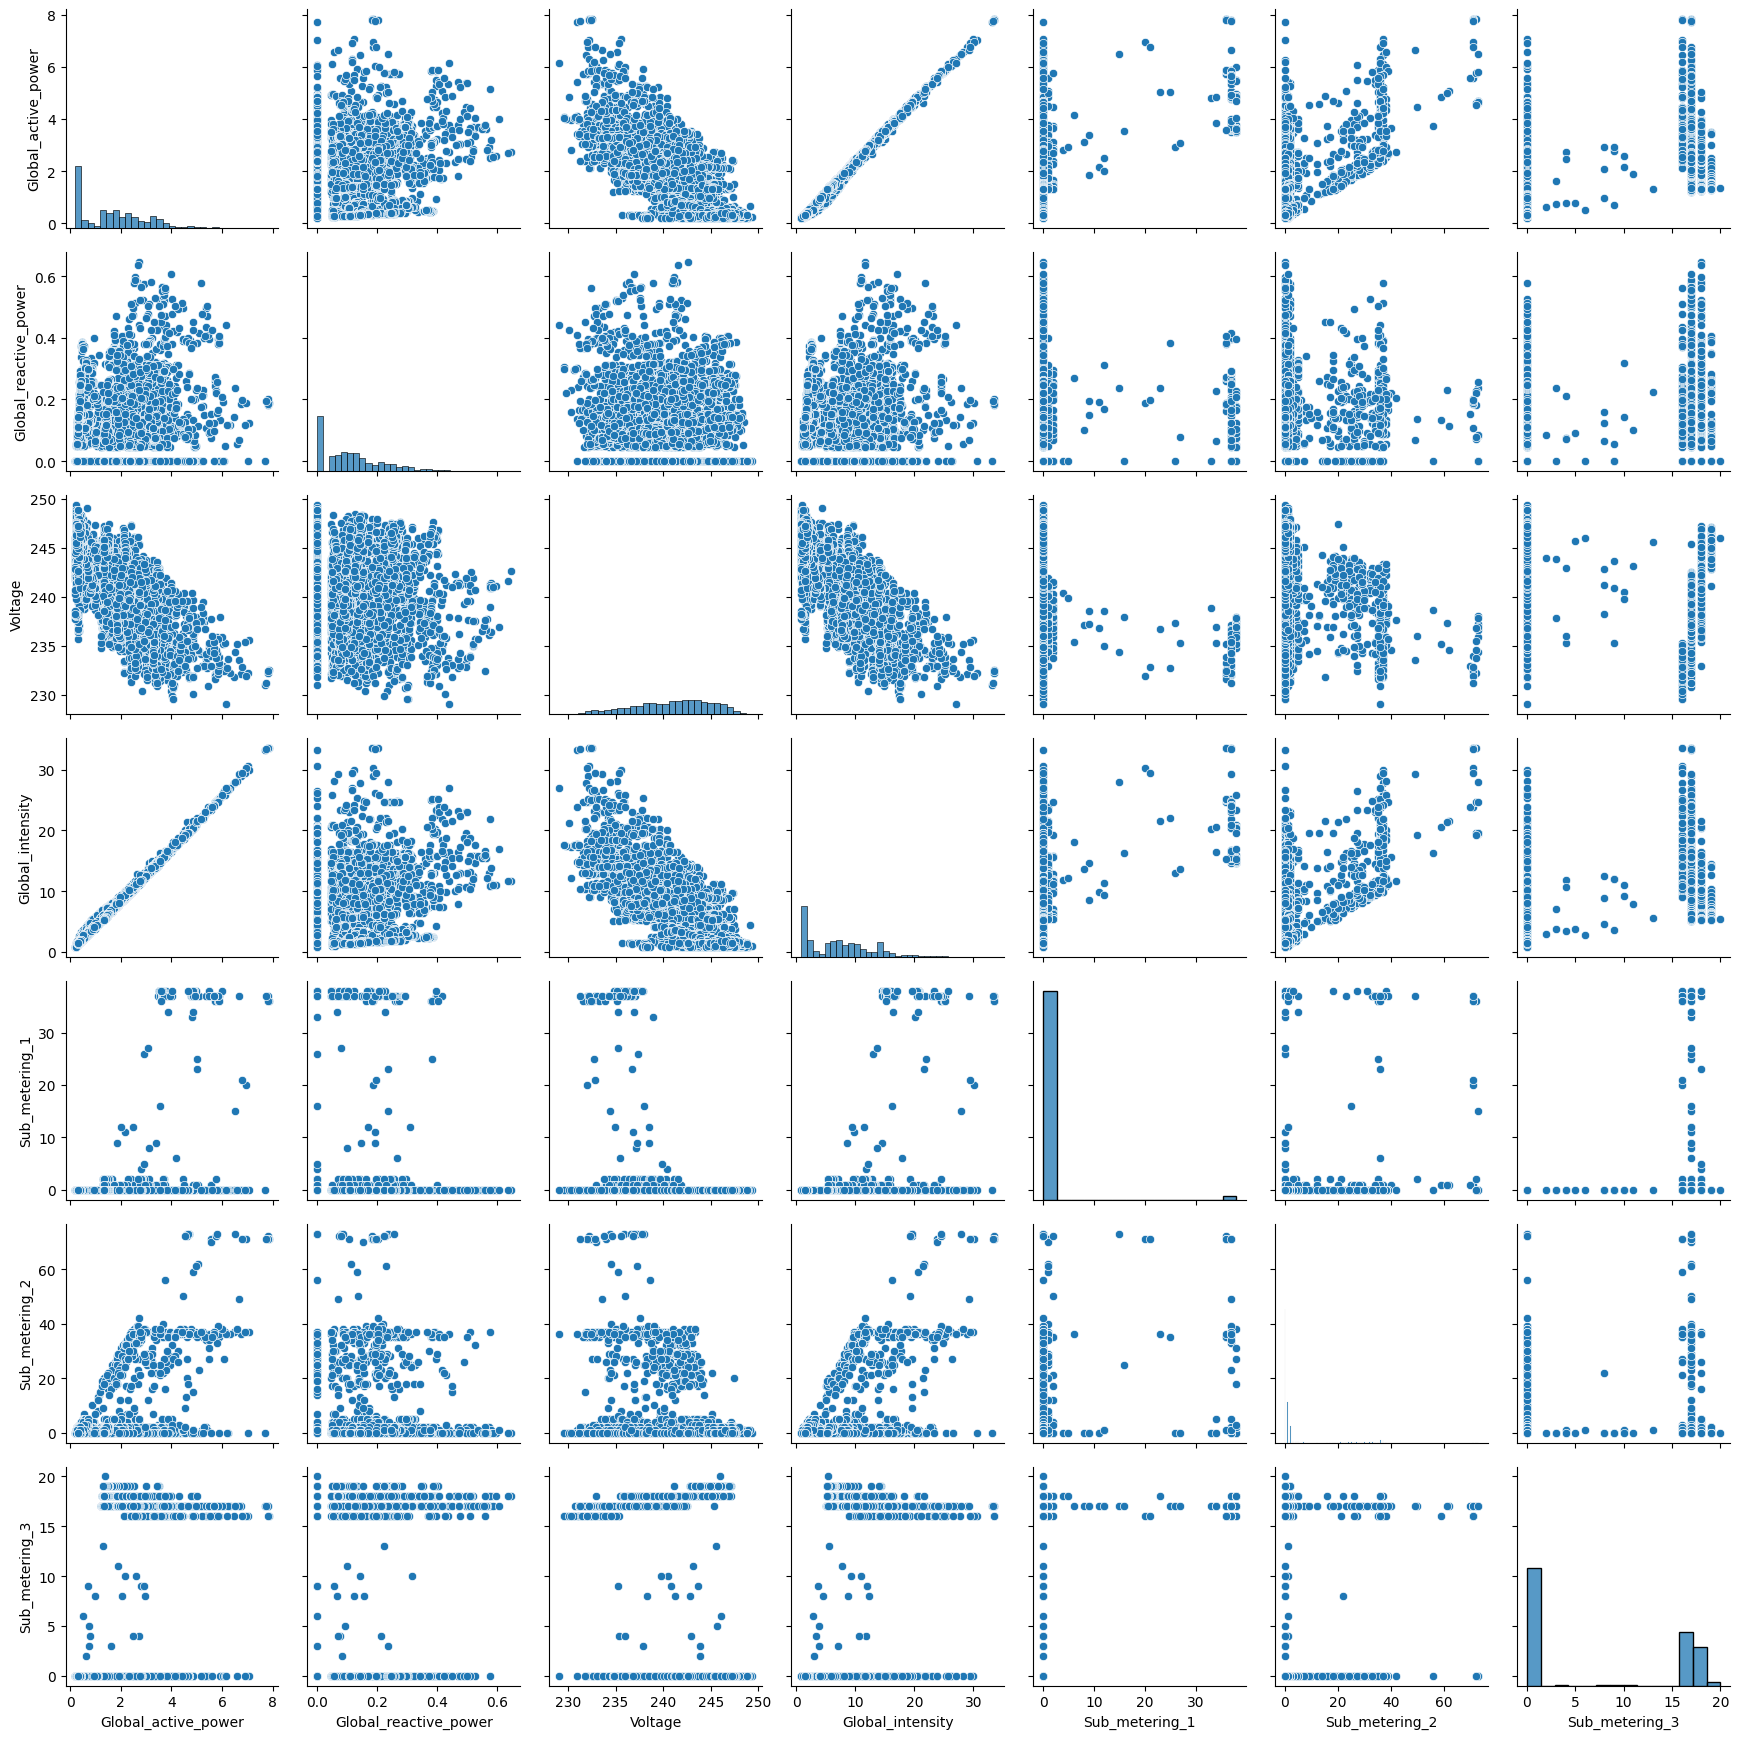

In [146]:
sns.pairplot(data, height=2.5)
plt.tight_layout()
plt.show()

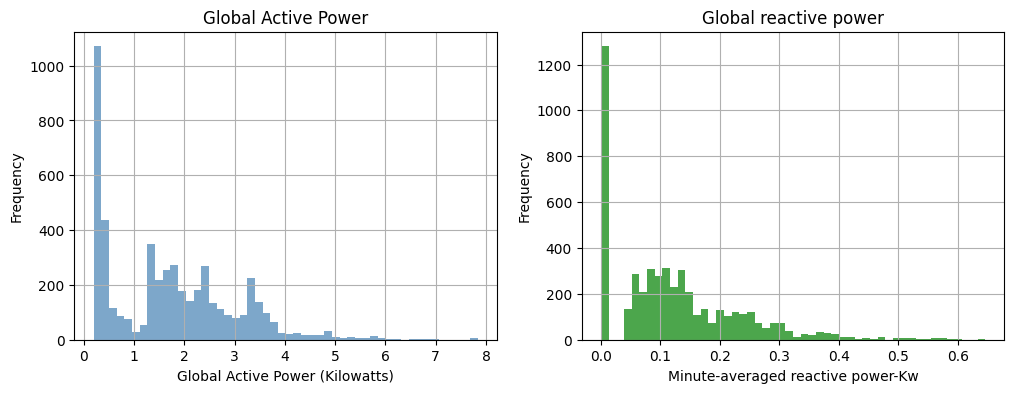

In [147]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(data['Global_active_power'],bins=50,color='steelblue',alpha=0.7)
plt.title('Global Active Power')
plt.xlabel('Global Active Power (Kilowatts)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(data['Global_reactive_power'],bins=50,color='green',alpha=0.7)
plt.title('Global reactive power')
plt.xlabel('Minute-averaged reactive power-Kw')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [148]:
X = data.drop(columns=['Global_active_power'])  # Features
y = data['Global_active_power']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
print(X_train.shape)
print(X_test.shape)

(4000, 6)
(1000, 6)


In [150]:
X_train.describe()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,4000.000000,4000.00000,4000.00000,4000.000000,4000.000000,4000.000000
mean,0.120554,240.99829,7.22545,0.755250,2.905000,7.742250
std,0.109299,3.92977,5.46814,5.044275,9.069732,8.659536
min,0.000000,229.08000,0.80000,0.000000,0.000000,0.000000
25%,0.000000,238.21750,1.80000,0.000000,0.000000,0.000000
50%,0.104000,241.41000,6.60000,0.000000,0.000000,0.000000
75%,0.178000,244.05000,10.40000,0.000000,1.000000,17.000000
max,0.636000,249.37000,33.60000,38.000000,73.000000,19.000000


In [151]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred_lin_train = linear_reg_model.predict(X_train)
y_pred_lin_test = linear_reg_model.predict(X_test)

train_lin_mse = mean_squared_error(y_train, y_pred_lin_train)
test_lin_mse = mean_squared_error(y_test, y_pred_lin_test)

train_lin_r2 = r2_score(y_train, y_pred_lin_train)
test_lin_r2 = r2_score(y_test, y_pred_lin_test)

print("Linear regression MSE: %.6f"%(test_lin_mse))
print("Linear regression R2_score: %.6f"%(test_lin_r2))

Linear regression MSE: 0.004393
Linear regression R2_score: 0.997516


In [152]:
# Decision Tree regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree_train = tree.predict(X_train)
y_pred_tree_test = tree.predict(X_test)

train_tree_mse = mean_squared_error(y_train, y_pred_tree_train)
test_tree_mse = mean_squared_error(y_test, y_pred_tree_test)

train_tree_r2 = r2_score(y_train, y_pred_tree_train)
test_tree_r2 = r2_score(y_test, y_pred_tree_test)

print("Decision tree regression MSE: %.6f"%(test_tree_mse))
print("Decision tree regression R2_score: %.6f"%(test_tree_r2))

Decision tree regression MSE: 0.004857
Decision tree regression R2_score: 0.997254


In [153]:
# Hyperparameter Tuning on Decision Tree Regression
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(tree, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)

best_params_dt = grid_search_tree.best_params_
best_score_dt = -grid_search_tree.best_score_

print("Best Parameters (Decision Tree):", best_params_dt)
print("Best Negative MSE (Decision Tree):", best_score_dt)

Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Negative MSE (Decision Tree): 0.003513417574493011


In [154]:
best_tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)
best_tree_model.fit(X_train, y_train)

y_pred_tree_test_best = best_tree_model.predict(X_test)

test_tree_mse_best = mean_squared_error(y_test, y_pred_tree_test_best)
test_tree_r2_best = r2_score(y_test, y_pred_tree_test_best)

print("Best Decision Tree Mean Squared Error: %.6f"%(test_tree_mse_best))
print("Best Decision Tree R2 Score: %.6f"%(test_tree_r2_best))

Best Decision Tree Mean Squared Error: 0.003740
Best Decision Tree R2 Score: 0.997885


In [155]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)

y_pred_random_train = random_model.predict(X_train)
y_pred_random_test = random_model.predict(X_test)

train_ran_mse = mean_squared_error(y_train, y_pred_random_train)
test_ran_mse = mean_squared_error(y_test, y_pred_random_test)

train_ran_r2 = r2_score(y_train, y_pred_random_train)
test_ran_r2 = r2_score(y_test, y_pred_random_test)

print("Random forest regression MSE: %.6f"%(test_ran_mse))
print("Random forest regression R2_score: %.6f"%(test_ran_r2))

Random forest regression MSE: 0.002853
Random forest regression R2_score: 0.998387


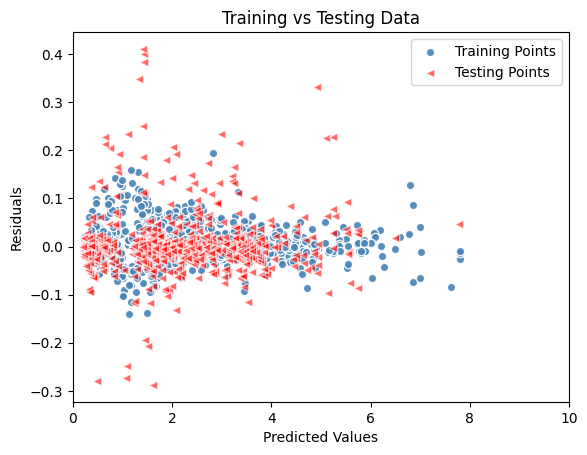

In [156]:
plt.scatter(y_pred_random_train,y_pred_random_train-y_train,
            color='steelblue',edgecolors='white',
            marker='o',alpha=0.9,
            label='Training Points')
plt.scatter(y_pred_random_test,y_pred_random_test-y_test,
            color='red',edgecolors='white',
            marker='<',alpha=0.6,
            label='Testing Points')
plt.title('Training vs Testing Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.xlim([0,10])
plt.show()

In [157]:
# Hyperparameter Tuning on Random Forest Regression
param_grid_rf = {
    'n_estimators': [5, 50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

grid_search_rf = GridSearchCV(estimator=random_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_ 

print("Best Parameters (Random Forest):", best_params_rf)
print("Best Negative MSE (Random Forest): %.6f"%(best_score_rf))

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Negative MSE (Random Forest): 0.002651


In [158]:
best_params_rf = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

best_rf_model = RandomForestRegressor(**best_params_rf)

best_rf_model.fit(X_train, y_train)
y_pred_rf_test_best = best_rf_model.predict(X_test)

test_ran_mse_best = mean_squared_error(y_test, y_pred_rf_test_best)
test_ran_r2_best = r2_score(y_test, y_pred_rf_test_best)

print("Best Random Forest Mean Squared Error: %.6f"%(test_ran_mse_best))
print("Best Random Forest R2 Score: %.6f"%(test_ran_r2_best))

Best Random Forest Mean Squared Error: 0.002740
Best Random Forest R2 Score: 0.998451


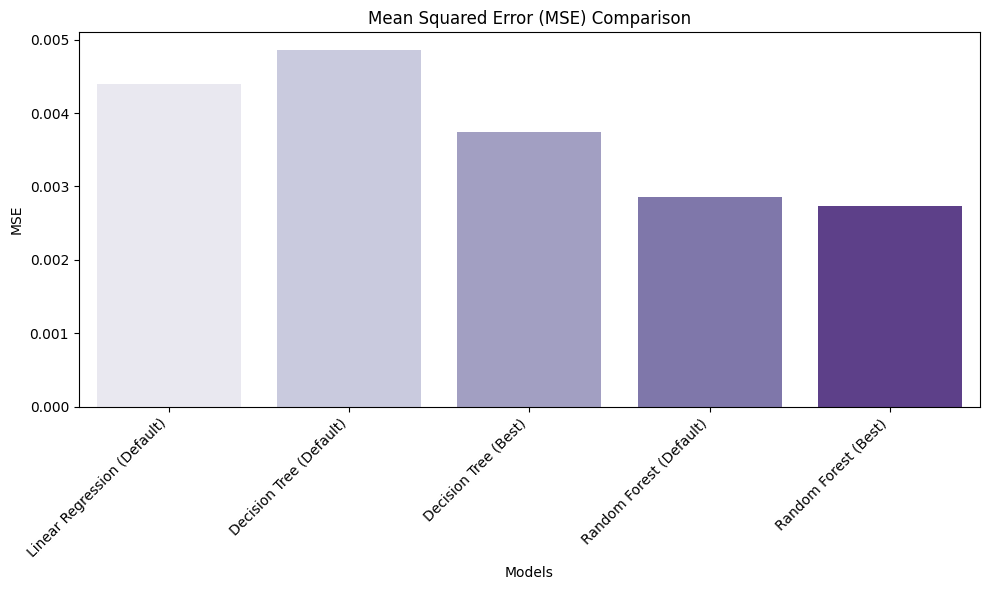

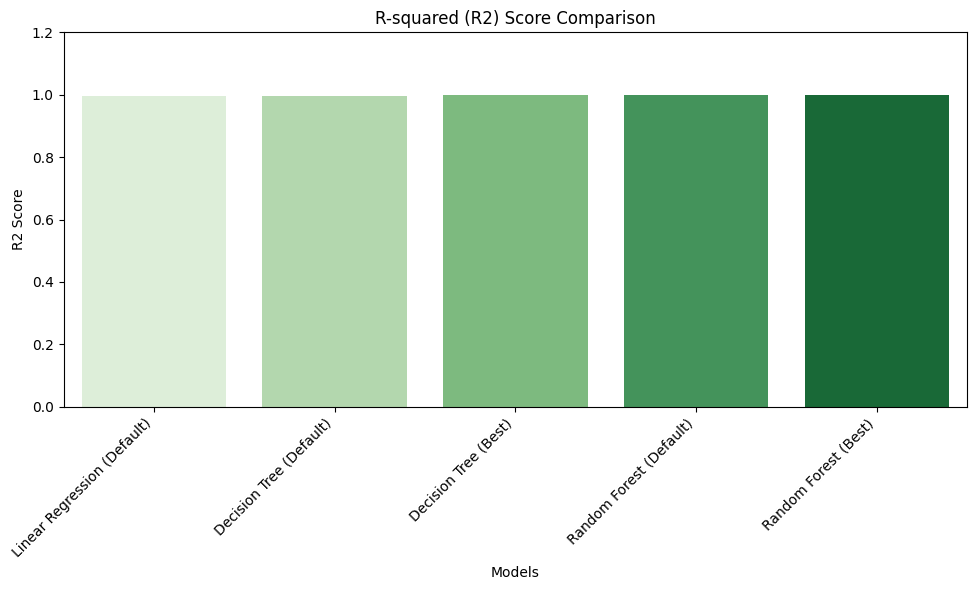

In [159]:
models = ['Linear Regression (Default)', 'Decision Tree (Default)','Decision Tree (Best)', 'Random Forest (Default)','Random Forest (Best)']

mse_values = [test_lin_mse, test_tree_mse,test_tree_mse_best, test_ran_mse, test_ran_mse_best]
r2_values = [test_lin_r2, test_tree_r2,test_tree_r2_best, test_ran_r2, test_ran_r2_best]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=mse_values, hue=models, palette='Purples', dodge=False)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_values, hue=models, palette='Greens', dodge=False)
plt.title('R-squared (R2) Score Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()